In [1]:
import numpy as np
import pandas as pd

from pickle import dump


from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\ammanana\Desktop\prosper_loan_data_new.csv")

In [3]:
df

,CreditGrade,LoanStatus,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IncomeRange,ListingNumber,Term,ListingCategory (numeric),...,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,InvestmentFromFriendsAmount,year
0,C,Completed,not available,CO,Other,Self-employed,"$25,000-49,999",193129,36,0,...,9425.00,1971.1400,-133.18,0.0,0.0,0.0,0.0,1.0,0.0,2007-01-01
1,not available,Current,A,CO,Professional,Employed,"$50,000-74,999",1209647,36,2,...,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,1.0,0.0,2014-01-01
2,HR,Completed,not available,GA,Other,Not available,Not displayed,81716,36,0,...,3001.00,1185.6300,-24.20,0.0,0.0,0.0,0.0,1.0,0.0,2007-01-01
3,not available,Current,A,GA,Skilled Labor,Employed,"$25,000-49,999",658116,36,16,...,4091.09,1052.1100,-108.01,0.0,0.0,0.0,0.0,1.0,0.0,2012-01-01
4,not available,Current,D,MN,Executive,Employed,"$100,000+",909464,36,2,...,1563.22,1256.6300,-60.27,0.0,0.0,0.0,0.0,1.0,0.0,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,not available,Current,C,IL,Food Service Management,Employed,"$50,000-74,999",753087,36,1,...,2238.38,1409.0200,-75.58,0.0,0.0,0.0,0.0,1.0,0.0,2013-01-01
113933,not available,FinalPaymentInProgress,A,PA,Professional,Employed,"$75,000-99,999",537216,36,7,...,1997.16,333.3900,-30.05,0.0,0.0,0.0,0.0,1.0,0.0,2011-01-01
113934,not available,Current,D,TX,Other,Employed,"$25,000-49,999",1069178,60,1,...,183.15,363.5500,-16.91,0.0,0.0,0.0,0.0,1.0,0.0,2013-01-01
113935,not available,Completed,C,GA,Food Service,Full-time,"$25,000-49,999",539056,60,2,...,15000.00,6122.5600,-235.05,0.0,0.0,0.0,0.0,1.0,0.0,2011-01-01


In [4]:
df.shape

(113937, 70)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 70 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   CreditGrade                          113937 non-null  object 
 1   LoanStatus                           113937 non-null  object 
 2   ProsperRating (Alpha)                113937 non-null  object 
 3   BorrowerState                        113937 non-null  object 
 4   Occupation                           113937 non-null  object 
 5   EmploymentStatus                     113937 non-null  object 
 6   IncomeRange                          113937 non-null  object 
 7   ListingNumber                        113937 non-null  int64  
 8   Term                                 113937 non-null  int64  
 9   ListingCategory (numeric)            113937 non-null  int64  
 10  OpenRevolvingAccounts                113937 non-null  int64  
 11  LoanCurrentDa

In [6]:
df.isnull().sum()


CreditGrade                        0
LoanStatus                         0
ProsperRating (Alpha)              0
BorrowerState                      0
Occupation                         0
                                  ..
LP_NetPrincipalLoss                0
LP_NonPrincipalRecoverypayments    0
PercentFunded                      0
InvestmentFromFriendsAmount        0
year                               0
Length: 70, dtype: int64

In [7]:
df.drop(labels=['year','ListingNumber',"LoanNumber","LoanStatus"],inplace=True,axis=1)

In [8]:
df.shape

(113937, 66)

In [9]:
df['Status'].value_counts()     

0    98874
1    15063
Name: Status, dtype: int64

In [10]:
y = df['Status']      #target varaible  -categorical values so we are using classification models
x = df.drop('Status',axis=1)     #input variables

In [11]:
#-----------------------Data Encoding------------------

In [12]:
categorical_data = x.select_dtypes(include=['object'])
categorical_data.head()

,CreditGrade,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IncomeRange
0,C,not available,CO,Other,Self-employed,"$25,000-49,999"
1,not available,A,CO,Professional,Employed,"$50,000-74,999"
2,HR,not available,GA,Other,Not available,Not displayed
3,not available,A,GA,Skilled Labor,Employed,"$25,000-49,999"
4,not available,D,MN,Executive,Employed,"$100,000+"


In [13]:
le = LabelEncoder()
categorical_data = categorical_data.apply(LabelEncoder().fit_transform)

In [14]:
categorical_data.head()

,CreditGrade,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IncomeRange
0,3,7,5,35,7,3
1,8,0,5,41,0,4
2,6,7,10,35,2,6
3,8,0,10,50,0,3
4,8,4,23,19,0,2


In [15]:
numerical_data = x.select_dtypes(include=['int','float'])
numerical_data.head()

,Term,ListingCategory (numeric),OpenRevolvingAccounts,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,Recommendations,InvestmentFromFriendsCount,Investors,BorrowerAPR,...,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,InvestmentFromFriendsAmount
0,36,0,1,0,78,9425,0,0,258,0.16516,...,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0.0
1,36,2,13,0,0,10000,0,0,1,0.12016,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0
2,36,0,0,0,86,3001,0,0,41,0.28269,...,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0.0
3,36,16,7,0,16,10000,0,0,158,0.12528,...,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0.0
4,36,2,6,0,6,15000,0,0,20,0.24614,...,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

numerical_data_rescaled = pd.DataFrame(scaler.fit_transform(numerical_data), 
                                    columns = numerical_data.columns, 
                                    index = numerical_data.index)

numerical_data_rescaled.head()

,Term,ListingCategory (numeric),OpenRevolvingAccounts,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,Recommendations,InvestmentFromFriendsCount,Investors,BorrowerAPR,...,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,InvestmentFromFriendsAmount
0,-0.462837,-0.694111,-1.289107,-0.327709,1.538101,0.174196,-0.144505,-0.100943,1.719559,-0.667883,...,1.505580,1.552881,0.755104,-1.293023,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191
1,-0.462837,-0.193708,1.302154,-0.327709,-1.064150,0.266258,-0.144505,-0.100943,-0.769821,-1.227898,...,-0.873133,-0.763123,-0.910541,0.901945,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191
2,-0.462837,-0.694111,-1.505046,-0.327709,1.804998,-0.854340,-0.144505,-0.100943,-0.382369,0.794753,...,0.000741,-0.025688,0.091335,0.503099,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191
3,-0.462837,3.309112,0.006523,-0.327709,-0.530355,0.266258,-0.144505,-0.100943,0.750928,-1.164181,...,0.200406,0.242180,-0.021491,-0.878191,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191
4,-0.462837,-0.193708,-0.209415,-0.327709,-0.863977,1.066799,-0.144505,-0.100943,-0.585781,0.339896,...,-0.284546,-0.378993,0.151332,-0.091378,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191


In [17]:
scaled_data = pd.concat([categorical_data,numerical_data_rescaled],axis=1)
scaled_data.head()

,CreditGrade,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IncomeRange,Term,ListingCategory (numeric),OpenRevolvingAccounts,LoanCurrentDaysDelinquent,...,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,InvestmentFromFriendsAmount
0,3,7,5,35,7,3,-0.462837,-0.694111,-1.289107,-0.327709,...,1.505580,1.552881,0.755104,-1.293023,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191
1,8,0,5,41,0,4,-0.462837,-0.193708,1.302154,-0.327709,...,-0.873133,-0.763123,-0.910541,0.901945,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191
2,6,7,10,35,2,6,-0.462837,-0.694111,-1.505046,-0.327709,...,0.000741,-0.025688,0.091335,0.503099,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191
3,8,0,10,50,0,3,-0.462837,3.309112,0.006523,-0.327709,...,0.200406,0.242180,-0.021491,-0.878191,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191
4,8,4,23,19,0,2,-0.462837,-0.193708,-0.209415,-0.327709,...,-0.284546,-0.378993,0.151332,-0.091378,0.130389,-0.293257,-0.289086,-0.09121,0.07905,-0.056191


In [18]:
#--------------PCA-------------------
#Principal component analysis, or PCA, is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

In [19]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(scaled_data)

component_names = [f"PC{i+1}" for i in range(x_pca.shape[1])]
x_pca = pd.DataFrame(x_pca, columns=component_names)

x_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65
0,3.528903,-17.036206,5.298294,3.635968,-1.230932,0.996783,5.214567,-0.843537,-0.460357,1.076417,...,-0.055376,-0.082785,-0.033598,0.068610,-0.051339,-0.008878,-0.005649,0.084433,-2.014554e-05,2.111163e-14
1,9.411816,-16.599003,-5.829949,0.914132,-1.304610,-2.431279,-1.450009,0.186897,0.587237,0.593474,...,0.383161,-0.039845,-0.132803,-0.086578,-0.137730,0.001833,-0.063213,0.006550,6.390549e-07,1.051886e-14
2,3.563569,-11.991336,4.776511,-1.745478,-3.149651,1.005021,0.312746,0.302865,-0.767170,-0.364375,...,0.182469,0.345966,-0.079377,-0.006446,-0.021523,0.000540,0.062031,0.216083,-4.320539e-06,-4.297314e-15
3,18.418895,-11.621385,-5.728371,1.758234,-2.455491,1.159899,-0.074125,-0.087591,0.487672,1.720568,...,-0.108959,0.121094,-0.029263,0.024283,-0.263346,-0.005350,-0.062296,0.001945,1.655352e-05,1.380969e-14
4,-12.533464,1.357287,-1.374550,-0.810965,2.731929,-0.676498,-1.356908,-1.564524,0.032797,-0.033788,...,-0.174529,-0.068884,-0.337607,0.117341,-0.063933,0.005667,-0.025184,-0.008290,-8.045723e-05,1.411614e-14


In [20]:
loadings = pd.DataFrame(pca.components_.T,columns=component_names,index=scaled_data.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65
CreditGrade,-0.000720,0.022601,-0.455015,-0.523032,0.035826,0.117457,0.110091,-0.029460,0.128303,0.095500,...,0.018649,0.082769,-0.001591,-0.009347,-0.069707,0.000878,-0.022808,-0.004017,-1.543046e-06,-0.000000e+00
ProsperRating (Alpha),0.004913,-0.020535,0.603529,-0.047945,0.156171,-0.036605,-0.053816,0.020569,-0.153112,-0.074529,...,0.075864,-0.196033,0.009889,0.012537,0.183058,0.000954,0.055506,-0.004481,7.930923e-07,6.758977e-17
BorrowerState,0.001784,0.999075,0.038495,0.012628,-0.008005,0.002246,-0.002811,0.004406,0.003296,0.002659,...,-0.000008,0.000378,0.000047,0.000060,0.000025,-0.000002,-0.000052,0.000030,6.073168e-08,-1.166643e-17
Occupation,0.999862,-0.001464,-0.010362,0.008198,0.006699,0.001253,-0.004980,0.001115,-0.001998,0.001406,...,-0.000210,0.000166,0.000033,-0.000007,0.000027,-0.000003,-0.000020,-0.000008,-6.496928e-08,5.591043e-19
EmploymentStatus,0.006114,-0.004550,0.134487,0.079540,-0.014791,-0.249160,0.872983,-0.161986,0.149326,0.156322,...,-0.008881,-0.002136,-0.000016,0.000270,-0.000173,-0.000238,-0.000012,-0.000351,-8.486018e-07,1.024792e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP_GrossPrincipalLoss,0.000981,-0.003295,0.070257,0.049858,0.071857,0.018873,-0.020860,0.014872,0.477239,-0.208814,...,-0.021552,-0.028783,0.000717,-0.022945,-0.004151,0.710660,-0.009326,0.001350,2.724868e-05,-4.689333e-19
LP_NetPrincipalLoss,0.000977,-0.003306,0.068926,0.048483,0.070612,0.017119,-0.020737,0.014843,0.467842,-0.204219,...,0.002644,-0.021757,-0.000520,-0.006075,-0.007240,-0.701649,0.008750,-0.001529,-2.641904e-05,-1.279685e-17
LP_NonPrincipalRecoverypayments,0.000253,-0.001047,0.031799,0.021196,0.033562,0.013251,-0.016872,0.010208,0.252308,-0.100533,...,0.023176,0.007481,-0.001360,-0.007170,-0.000300,-0.014174,0.001375,-0.000219,-3.634356e-06,-2.129706e-16
PercentFunded,0.000022,-0.000104,0.007534,0.006896,-0.019492,-0.051077,-0.015493,0.010888,-0.010664,-0.006118,...,-0.006503,0.015740,-0.000808,0.002022,0.002942,-0.000322,-0.000276,-0.000110,1.886031e-07,-4.409522e-17


In [21]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46723469, 0.86822434, 0.89385867, 0.90686935, 0.9157861 ,
       0.92233733, 0.92780913, 0.93298353, 0.93771005, 0.94153839,
       0.94515082, 0.94826196, 0.95111923, 0.95382798, 0.95640999,
       0.95884508, 0.96109336, 0.96323709, 0.96525456, 0.96715802,
       0.96898824, 0.97074543, 0.97248303, 0.97414165, 0.97574477,
       0.97731091, 0.97884432, 0.98033041, 0.98171814, 0.98309744,
       0.98436418, 0.98561182, 0.98677918, 0.98792486, 0.98896298,
       0.98989564, 0.99080206, 0.99163717, 0.99244026, 0.99320603,
       0.9939362 , 0.99466403, 0.99529161, 0.99591504, 0.99638383,
       0.99684244, 0.99729169, 0.99772842, 0.99814746, 0.99848928,
       0.99880475, 0.99907908, 0.9993266 , 0.9994883 , 0.99963556,
       0.99977138, 0.99986911, 0.99991646, 0.99996059, 0.99998355,
       0.99999173, 0.99999884, 1.        , 1.        , 1.        ])

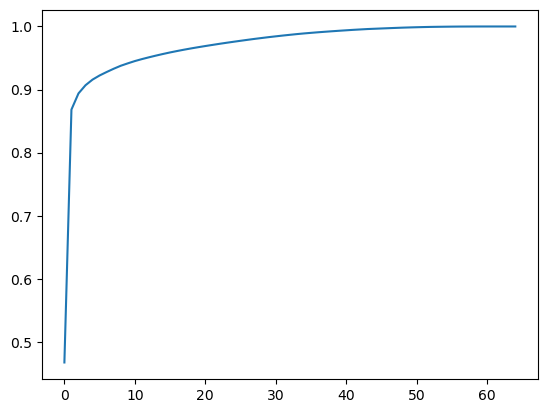

In [22]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [23]:
#------------------------MUTUAL INFORMATION GAIN---------------------: 
#x,y values the column which has important it will give good score
#less importance-less score
#high importance-high score


In [24]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(scaled_data,y)
mutual_info

array([0.07320571, 0.07013566, 0.00726475, 0.00991588, 0.04222768,
       0.02330772, 0.0192323 , 0.04107905, 0.0148458 , 0.39672633,
       0.09200085, 0.0185114 , 0.00433612, 0.00256518, 0.03296534,
       0.09439723, 0.08226733, 0.07948756, 0.08946599, 0.08899429,
       0.0922581 , 0.06881334, 0.05943827, 0.01250526, 0.03775746,
       0.0407726 , 0.01883467, 0.01873504, 0.00643309, 0.01830447,
       0.03060614, 0.02538482, 0.0217894 , 0.00890159, 0.00757346,
       0.00908086, 0.00151083, 0.01922563, 0.02108104, 0.02517876,
       0.01611002, 0.02514294, 0.0086472 , 0.00321589, 0.01252387,
       0.00214177, 0.00445687, 0.00203472, 0.00265863, 0.0020077 ,
       0.00326182, 0.00309518, 0.00402545, 0.33909281, 0.06625419,
       0.05256096, 0.08485928, 0.0192524 , 0.02147821, 0.04186438,
       0.34627912, 0.34334776, 0.04533905, 0.00125214, 0.00244982])

In [25]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = scaled_data.columns
mutual_info.sort_values(ascending=False).head(30)

LoanCurrentDaysDelinquent             0.396726
LP_GrossPrincipalLoss                 0.346279
LP_NetPrincipalLoss                   0.343348
LoanFirstDefaultedCycleNumber         0.339093
BorrowerAPR                           0.094397
EstimatedReturn                       0.092258
LoanMonthsSinceOrigination            0.092001
EstimatedEffectiveYield               0.089466
EstimatedLoss                         0.088994
LP_CustomerPrincipalPayments          0.084859
BorrowerRate                          0.082267
LenderYield                           0.079488
CreditGrade                           0.073206
ProsperRating (Alpha)                 0.070136
ProsperRating (numeric)               0.068813
MonthlyLoanPayment                    0.066254
ProsperScore                          0.059438
LP_CustomerPayments                   0.052561
LP_NonPrincipalRecoverypayments       0.045339
EmploymentStatus                      0.042228
LP_CollectionFees                     0.041864
ListingCatego

<AxesSubplot:>

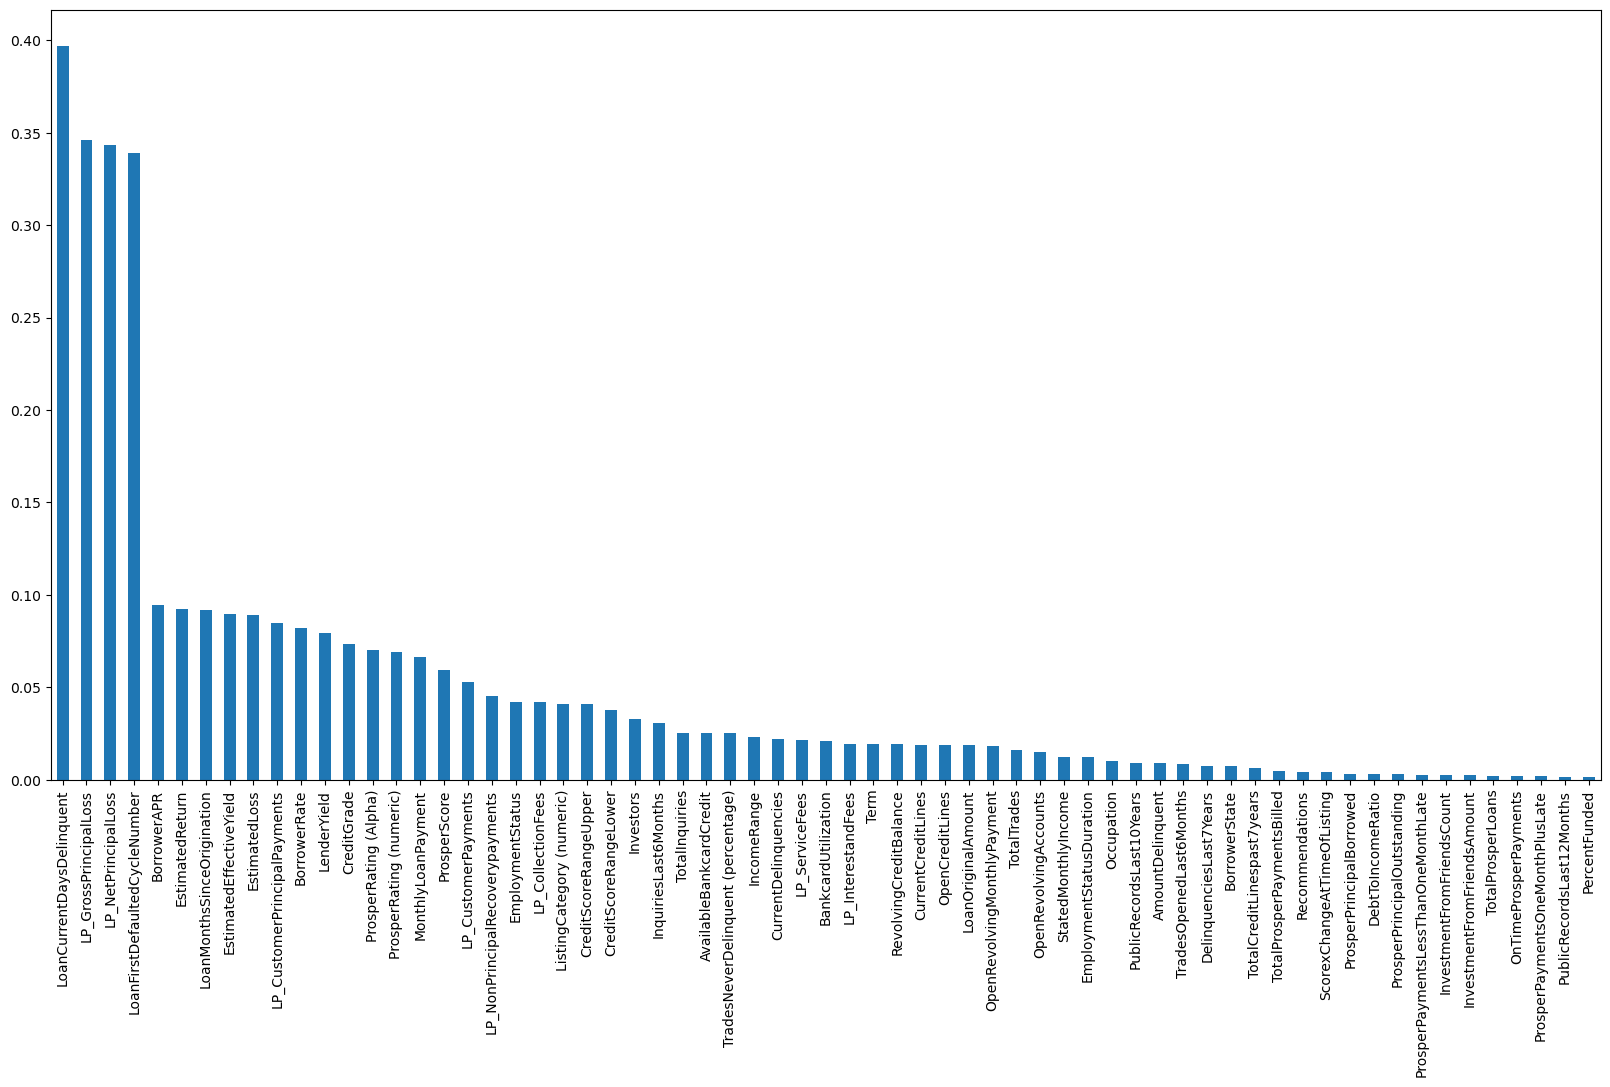

In [26]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,10))

In [27]:
#----------------------Correlation matrix---------------------

In [28]:
correlation_matrix = pd.concat([x,y],axis=1)
correlation_matrix.head()

,CreditGrade,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,IncomeRange,Term,ListingCategory (numeric),OpenRevolvingAccounts,LoanCurrentDaysDelinquent,...,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,InvestmentFromFriendsAmount,Status
0,C,not available,CO,Other,Self-employed,"$25,000-49,999",36,0,1,0,...,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0.0,0
1,not available,A,CO,Professional,Employed,"$50,000-74,999",36,2,13,0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0
2,HR,not available,GA,Other,Not available,Not displayed,36,0,0,0,...,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0.0,0
3,not available,A,GA,Skilled Labor,Employed,"$25,000-49,999",36,16,7,0,...,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0.0,0
4,not available,D,MN,Executive,Employed,"$100,000+",36,2,6,0,...,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0.0,0


In [29]:
#-------------------Creating the model using PCA---------------------------------

In [30]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, train_size=0.7, random_state=100)

In [31]:
pca = PCA(n_components=20)
x_train_pca = pca.fit_transform(X_train)
x_train_pca
x_test_pca = pca.transform(X_test)

In [32]:
#Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(x_train_pca, y_train)


LogisticRegression()

In [34]:
y_train_pred = regressor.predict(x_train_pca)

In [35]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
103781,0,0
56535,0,0
74830,0,0
98341,0,0
84660,0,1


In [36]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.9713246818381293
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     69176
           1       0.91      0.87      0.89     10579

    accuracy                           0.97     79755
   macro avg       0.94      0.93      0.94     79755
weighted avg       0.97      0.97      0.97     79755



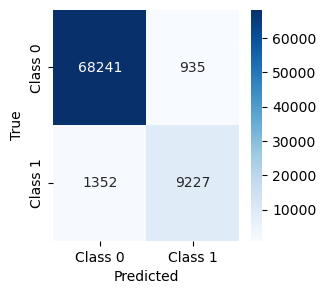

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [38]:
y_test_pred = regressor.predict(x_test_pca)

In [39]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
29253,0,0
82732,0,0
14796,0,0
103448,1,1
99191,0,0


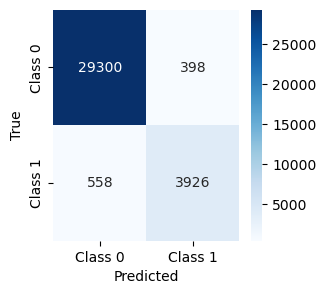

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [41]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.9720320636592359
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     29698
           1       0.91      0.88      0.89      4484

    accuracy                           0.97     34182
   macro avg       0.94      0.93      0.94     34182
weighted avg       0.97      0.97      0.97     34182



In [42]:
#Navie Byes

In [43]:
from sklearn.naive_bayes import BernoulliNB
navie_byes = BernoulliNB()
navie_byes.fit(x_train_pca, y_train)

BernoulliNB()

In [44]:
y_train_pred = navie_byes.predict(x_train_pca)

In [45]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
103781,0,0
56535,0,0
74830,0,0
98341,0,0
84660,0,1


In [46]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.9284433577832111
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     69176
           1       0.87      0.54      0.67     10579

    accuracy                           0.93     79755
   macro avg       0.90      0.76      0.81     79755
weighted avg       0.93      0.93      0.92     79755



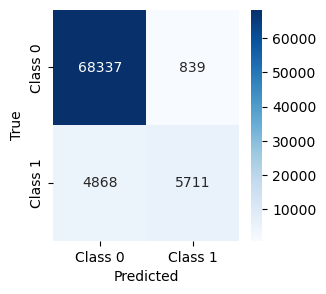

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [48]:
y_test_pred = navie_byes.predict(x_test_pca)

In [49]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
29253,0,0
82732,0,0
14796,0,0
103448,1,1
99191,0,0


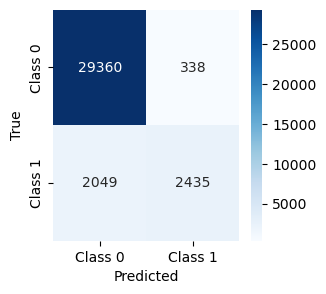

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [51]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.9301679246386987
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     29698
           1       0.88      0.54      0.67      4484

    accuracy                           0.93     34182
   macro avg       0.91      0.77      0.82     34182
weighted avg       0.93      0.93      0.92     34182



In [52]:
#Creating Model Using Mutual Information

In [53]:
x = scaled_data[['LoanCurrentDaysDelinquent','LP_GrossPrincipalLoss','LP_NetPrincipalLoss','LoanFirstDefaultedCycleNumber','BorrowerAPR','EstimatedReturn','LoanMonthsSinceOrigination',
     'EstimatedEffectiveYield','EstimatedLoss','LP_CustomerPrincipalPayments','BorrowerRate','LenderYield','CreditGrade','ProsperRating (numeric)','ProsperRating (Alpha)',
     'MonthlyLoanPayment','ProsperScore','LP_CustomerPayments']]

In [54]:
x

,LoanCurrentDaysDelinquent,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LoanFirstDefaultedCycleNumber,BorrowerAPR,EstimatedReturn,LoanMonthsSinceOrigination,EstimatedEffectiveYield,EstimatedLoss,LP_CustomerPrincipalPayments,BorrowerRate,LenderYield,CreditGrade,ProsperRating (numeric),ProsperRating (Alpha),MonthlyLoanPayment,ProsperScore,LP_CustomerPayments
0,-0.327709,-0.293257,-0.289086,0.0,-0.667883,-1.904172e-14,1.538101,-7.516029e-15,8.046931e-14,1.552881,-0.464648,-0.599888,3,-1.325173,7,0.300753,-1.339948,1.505580
1,-0.327709,-0.293257,-0.289086,0.0,-1.227898,-1.576707e+00,-1.064150,-1.507329e+00,-1.372935e+00,-0.763123,-1.346787,-1.351410,8,1.296556,0,0.241074,0.776764,-0.873133
2,-0.327709,-0.293257,-0.289086,0.0,0.794753,-1.904172e-14,1.804998,-7.516029e-15,8.046931e-14,-0.025688,1.099145,0.768955,6,-1.325173,7,-0.774043,-1.339948,0.000741
3,-0.327709,-0.293257,-0.289086,0.0,-1.164181,-1.374703e+00,-0.530355,-1.417629e+00,-1.372935e+00,0.242180,-1.274612,-1.278942,8,1.296556,0,0.254151,1.381539,0.200406
4,-0.327709,-0.293257,-0.289086,0.0,0.339896,-2.061312e-01,-0.863977,2.453816e-01,3.021659e-01,-0.378993,0.210323,0.212024,8,-0.014309,4,1.512708,-0.130398,-0.284546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,-0.327709,-0.293257,-0.289086,0.0,0.058644,-4.071693e-02,-0.697166,-6.366143e-02,-2.578529e-01,-0.213086,-0.085060,-0.084559,8,0.422646,3,0.478805,0.171989,-0.111812
113933,-0.327709,-0.293257,-0.289086,0.0,-1.078063,-5.857457e-01,-0.130009,-1.150220e+00,-1.494355e+00,-0.272361,-1.092838,-1.096429,8,1.296556,0,-1.073737,1.079151,-0.386678
113934,-0.327709,-0.293257,-0.289086,0.0,0.261494,-3.921271e-01,-0.964063,3.320355e-01,5.499618e-01,-0.718118,0.297200,0.299254,8,-0.014309,4,0.004537,-0.432786,-0.759020
113935,-0.327709,-0.293257,-0.289086,0.0,0.812052,2.417630e+00,-0.130009,1.283536e+00,1.163189e-01,2.922825,0.905342,0.909865,8,0.422646,3,0.918926,0.171989,3.535772


In [55]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   LoanCurrentDaysDelinquent      113937 non-null  float64
 1   LP_GrossPrincipalLoss          113937 non-null  float64
 2   LP_NetPrincipalLoss            113937 non-null  float64
 3   LoanFirstDefaultedCycleNumber  113937 non-null  float64
 4   BorrowerAPR                    113937 non-null  float64
 5   EstimatedReturn                113937 non-null  float64
 6   LoanMonthsSinceOrigination     113937 non-null  float64
 7   EstimatedEffectiveYield        113937 non-null  float64
 8   EstimatedLoss                  113937 non-null  float64
 9   LP_CustomerPrincipalPayments   113937 non-null  float64
 10  BorrowerRate                   113937 non-null  float64
 11  LenderYield                    113937 non-null  float64
 12  CreditGrade                   

In [56]:
#LogisticRegression

In [57]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

In [58]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)


LogisticRegression()

In [59]:
y_train_pred = regressor.predict(X_train)

In [60]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
103781,0,0
56535,0,0
74830,0,0
98341,0,0
84660,0,0


In [61]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.9993730800576767
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     69176
           1       1.00      1.00      1.00     10579

    accuracy                           1.00     79755
   macro avg       1.00      1.00      1.00     79755
weighted avg       1.00      1.00      1.00     79755



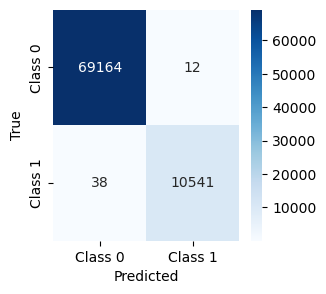

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [63]:
y_test_pred = regressor.predict(X_test)

In [64]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
29253,0,0
82732,0,0
14796,0,0
103448,1,1
99191,0,0


In [65]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.9993856415657364
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29698
           1       1.00      1.00      1.00      4484

    accuracy                           1.00     34182
   macro avg       1.00      1.00      1.00     34182
weighted avg       1.00      1.00      1.00     34182



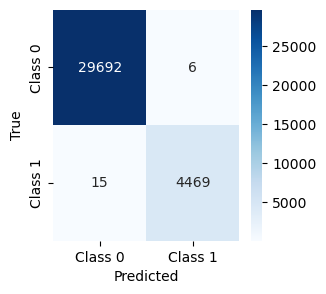

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [67]:
#Navie Bayes

In [68]:
from sklearn.naive_bayes import BernoulliNB
navie_byes = BernoulliNB()
navie_byes.fit(X_train, y_train)

BernoulliNB()

In [69]:
y_train_pred = navie_byes.predict(X_train)

In [70]:
temp_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
103781,0,0
56535,0,0
74830,0,0
98341,0,0
84660,0,1


In [71]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

0.9888282866277976
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     69176
           1       0.93      0.99      0.96     10579

    accuracy                           0.99     79755
   macro avg       0.96      0.99      0.98     79755
weighted avg       0.99      0.99      0.99     79755



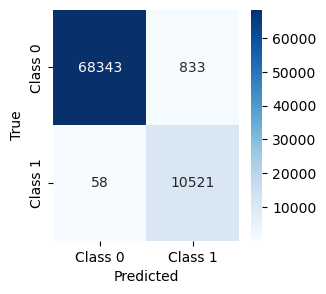

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [73]:
y_test_pred = navie_byes.predict(X_test)

In [74]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
29253,0,0
82732,0,0
14796,0,0
103448,1,1
99191,0,0


In [75]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.9886489965478907
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     29698
           1       0.93      0.99      0.96      4484

    accuracy                           0.99     34182
   macro avg       0.96      0.99      0.98     34182
weighted avg       0.99      0.99      0.99     34182



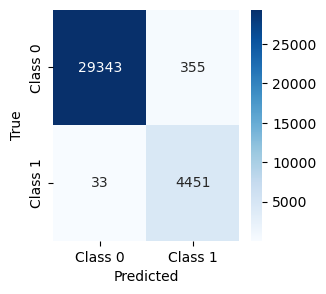

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [77]:
#Resampling and Regualrization on PCA data

In [78]:
y_train.value_counts()

0    69176
1    10579
Name: Status, dtype: int64

In [79]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, train_size=0.7, random_state=100)

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
pca = PCA(n_components=20)
x_train_pca = pca.fit_transform(X_train)
x_train_pca

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled_pca, y_resampled = smote.fit_resample(x_train_pca, y_train)

x_test_pca = pca.transform(X_test)

In [82]:
y_resampled.value_counts()

0    69176
1    69176
Name: Status, dtype: int64

In [83]:
#Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_resampled_pca, y_resampled)


LogisticRegression()

In [85]:
y_train_pred = regressor.predict(X_resampled_pca)

In [86]:
temp_df = pd.DataFrame({'Actual': y_resampled, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [87]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_resampled, y_train_pred))
print(metrics.classification_report(y_resampled, y_train_pred))

0.9816843992136001
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     69176
           1       0.98      0.99      0.98     69176

    accuracy                           0.98    138352
   macro avg       0.98      0.98      0.98    138352
weighted avg       0.98      0.98      0.98    138352



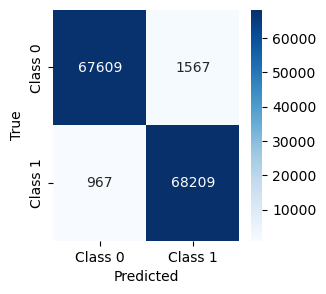

In [88]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_resampled, y_train_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [89]:
y_test_pred = regressor.predict(x_test_pca)

In [90]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
29253,0,0
82732,0,0
14796,0,0
103448,1,1
99191,0,0


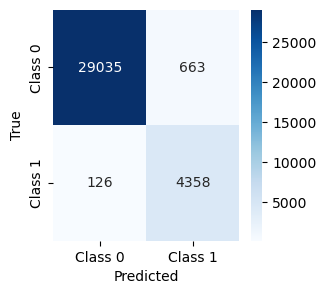

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [92]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.9769176759698087
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     29698
           1       0.87      0.97      0.92      4484

    accuracy                           0.98     34182
   macro avg       0.93      0.97      0.95     34182
weighted avg       0.98      0.98      0.98     34182



In [93]:
#Reguarlization on logistic Regression(pca data)

In [94]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_resampled_pca, y_resampled)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2'}
accuracy : 0.9815832362021004


In [95]:
## creating model using best params

from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression(C = 1,penalty =  'l2')
log_regressor.fit(X_resampled_pca, y_resampled)


LogisticRegression(C=1)

In [96]:
y_train_pred = log_regressor.predict(X_resampled_pca)

In [97]:
temp_df = pd.DataFrame({'Actual': y_resampled, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [98]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_resampled, y_train_pred))
print(metrics.classification_report(y_resampled, y_train_pred))

0.9816843992136001
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     69176
           1       0.98      0.99      0.98     69176

    accuracy                           0.98    138352
   macro avg       0.98      0.98      0.98    138352
weighted avg       0.98      0.98      0.98    138352



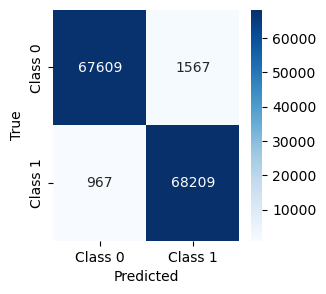

In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_resampled, y_train_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [100]:
y_test_pred = log_regressor.predict(x_test_pca)

In [101]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
29253,0,0
82732,0,0
14796,0,0
103448,1,1
99191,0,0


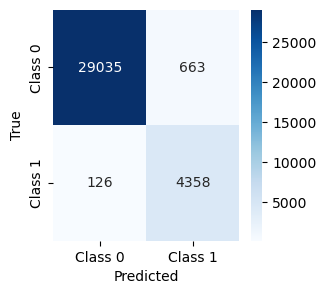

In [102]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [103]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.9769176759698087
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     29698
           1       0.87      0.97      0.92      4484

    accuracy                           0.98     34182
   macro avg       0.93      0.97      0.95     34182
weighted avg       0.98      0.98      0.98     34182



Navie Byes on PCA Data

In [104]:
from sklearn.naive_bayes import BernoulliNB
navie_byes = BernoulliNB()
navie_byes.fit(X_resampled_pca, y_resampled)

BernoulliNB()

In [105]:
y_train_pred = navie_byes.predict(X_resampled_pca)

In [106]:
temp_df = pd.DataFrame({'Actual': y_resampled, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [107]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_resampled, y_train_pred))
print(metrics.classification_report(y_resampled, y_train_pred))

0.9077714814386493
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     69176
           1       0.94      0.87      0.90     69176

    accuracy                           0.91    138352
   macro avg       0.91      0.91      0.91    138352
weighted avg       0.91      0.91      0.91    138352



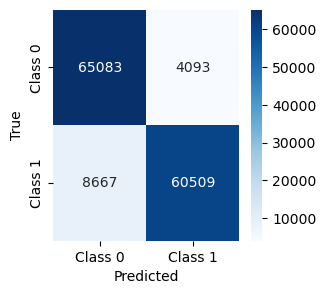

In [108]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_resampled, y_train_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [109]:
y_test_pred = navie_byes.predict(x_test_pca)

In [110]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
29253,0,0
82732,0,0
14796,0,0
103448,1,1
99191,0,0


In [111]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.9300509039845533
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     29698
           1       0.69      0.84      0.76      4484

    accuracy                           0.93     34182
   macro avg       0.83      0.89      0.86     34182
weighted avg       0.94      0.93      0.93     34182



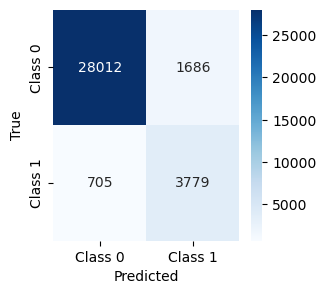

In [112]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [113]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import BernoulliNB
grid={ 
    'alpha': [0.1, 0.5, 1.0],'binarize': [0.0, 0.5, 1.0],}
navie=BernoulliNB()
navie_byes=GridSearchCV(navie,grid,cv=5)
navie_byes.fit(X_resampled_pca, y_resampled)

print("tuned hpyerparameters :(best parameters) ",navie_byes.best_params_)
print("accuracy :",navie_byes.best_score_)

tuned hpyerparameters :(best parameters)  {'alpha': 0.1, 'binarize': 0.0}
accuracy : 0.9075763978620335


In [114]:
from sklearn.naive_bayes import BernoulliNB
navie_byes = BernoulliNB(alpha=0.5,binarize=0.0)
navie_byes.fit(X_resampled_pca, y_resampled)

BernoulliNB(alpha=0.5)

In [115]:
y_train_pred = navie_byes.predict(X_resampled_pca)

In [116]:
temp_df = pd.DataFrame({'Actual': y_resampled, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [117]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_resampled, y_train_pred))
print(metrics.classification_report(y_resampled, y_train_pred))

0.9077787093789753
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     69176
           1       0.94      0.87      0.90     69176

    accuracy                           0.91    138352
   macro avg       0.91      0.91      0.91    138352
weighted avg       0.91      0.91      0.91    138352



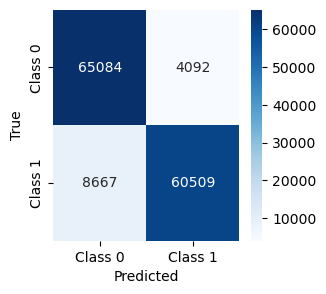

In [118]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_resampled, y_train_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [119]:
y_test_pred = navie_byes.predict(x_test_pca)

In [120]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.930109414311626
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     29698
           1       0.69      0.84      0.76      4484

    accuracy                           0.93     34182
   macro avg       0.83      0.89      0.86     34182
weighted avg       0.94      0.93      0.93     34182



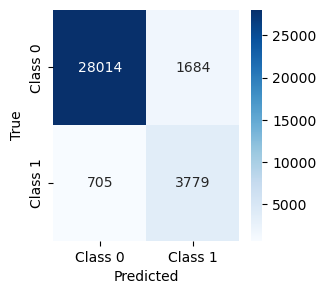

In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Resampling and Regualrization on mutual information data

Navie Bayes using BernoulliNB

In [122]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)

In [123]:
X_train

,LoanCurrentDaysDelinquent,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LoanFirstDefaultedCycleNumber,BorrowerAPR,EstimatedReturn,LoanMonthsSinceOrigination,EstimatedEffectiveYield,EstimatedLoss,LP_CustomerPrincipalPayments,BorrowerRate,LenderYield,CreditGrade,ProsperRating (numeric),ProsperRating (Alpha),MonthlyLoanPayment,ProsperScore,LP_CustomerPayments
103781,-0.327709,-0.293257,-0.289086,0.000000,-0.209417,4.318954e-01,-0.130009,-2.981224e-02,-5.155607e-01,2.922825,-0.171938,-0.171789,8,0.859601,2,1.399784,1.079151,2.931808
56535,-0.327709,-0.293257,-0.289086,0.000000,-1.164181,-1.374703e+00,-0.496993,-1.417629e+00,-1.372935e+00,-0.311376,-1.274612,-1.278942,8,1.296556,0,-0.663351,1.381539,-0.390049
74830,-0.327709,-0.293257,-0.289086,0.000000,-1.292238,-1.267984e+00,0.770771,-1.791662e+00,-1.469575e+00,0.465526,-1.320056,-1.324570,8,1.296556,0,-0.584056,1.381539,0.193900
98341,-0.327709,-0.293257,-0.289086,0.000000,-0.740062,1.879665e-01,-0.430268,-7.237205e-01,-1.372935e+00,-0.477995,-0.753348,-0.755561,8,1.296556,0,-0.815092,1.381539,-0.439522
84660,-0.018907,1.289805,1.315029,-2.380305,1.080361,-1.904172e-14,1.704912,-7.516029e-15,8.046931e-14,-0.709345,1.299631,1.171556,6,-1.325173,7,-0.544149,-1.339948,-0.770214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65615,-0.327709,-0.293257,-0.289086,0.000000,-1.077192,-1.123152e+00,-0.797252,-1.221304e+00,-1.249037e+00,2.922825,-1.107540,-1.111191,8,1.296556,0,0.278075,0.776764,2.328064
77655,-0.327709,-0.293257,-0.289086,0.000000,-0.745414,-1.904172e-14,2.071896,-7.516029e-15,8.046931e-14,-0.271663,-0.571574,-0.505948,3,-1.325173,7,-1.054224,-1.339948,-0.392472
79683,-0.327709,-0.293257,-0.289086,0.000000,1.395588,2.810203e+00,0.203613,1.847125e+00,6.862495e-01,1.079851,1.366460,1.372856,8,-0.014309,4,0.227633,0.474376,0.850056
56088,-0.327709,-0.293257,-0.289086,0.000000,-0.962700,-1.105619e+00,-1.030788,-1.086584e+00,-1.063190e+00,-0.763123,-0.987248,-0.990411,8,1.296556,0,1.464705,1.986314,-0.873133


In [124]:
##n resampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

Navie Bayes

In [125]:
from sklearn.naive_bayes import BernoulliNB
navie_byes = BernoulliNB()
navie_byes.fit(X_resampled, y_resampled)

BernoulliNB()

In [126]:
y_train_pred = navie_byes.predict(X_resampled)

In [127]:
temp_df = pd.DataFrame({'Actual': y_resampled, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [128]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_resampled, y_train_pred))
print(metrics.classification_report(y_resampled, y_train_pred))

0.9924829420608303
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     69176
           1       0.99      1.00      0.99     69176

    accuracy                           0.99    138352
   macro avg       0.99      0.99      0.99    138352
weighted avg       0.99      0.99      0.99    138352



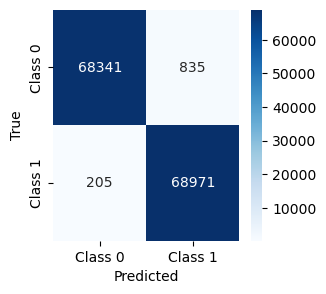

In [129]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_resampled, y_train_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [130]:
y_test_pred = navie_byes.predict(X_test)

In [131]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
29253,0,0
82732,0,0
14796,0,0
103448,1,1
99191,0,0


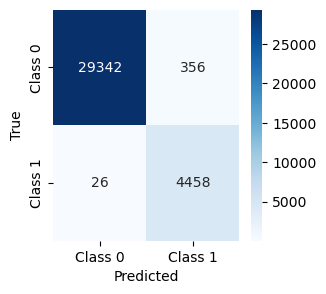

In [132]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

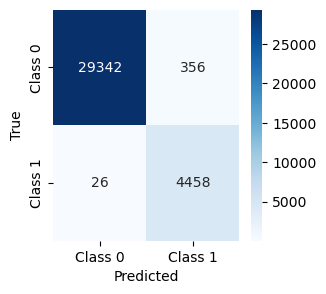

In [133]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Reguarlization on Navie Byes(mutual information)


In [134]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import BernoulliNB
grid={ 
    'alpha': [0.1, 0.5, 1.0],'binarize': [0.0, 0.5, 1.0],}
navie=BernoulliNB()
navie_byes=GridSearchCV(navie,grid,cv=5)
navie_byes.fit(X_resampled,y_resampled)

print("tuned hpyerparameters :(best parameters) ",navie_byes.best_params_)
print("accuracy :",navie_byes.best_score_)

tuned hpyerparameters :(best parameters)  {'alpha': 0.1, 'binarize': 0.0}
accuracy : 0.9935093116225726


In [135]:
from sklearn.naive_bayes import BernoulliNB
navie_byes = BernoulliNB(alpha= 0.1,binarize= 0.0)
navie_byes.fit(X_resampled, y_resampled)

BernoulliNB(alpha=0.1)

In [136]:
y_train_pred = navie_byes.predict(X_resampled)

In [137]:
temp_df = pd.DataFrame({'Actual': y_resampled, 'Predicted': y_train_pred})

temp_df.head()

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [138]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_resampled, y_train_pred))
print(metrics.classification_report(y_resampled, y_train_pred))

0.9935237654677923
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     69176
           1       0.99      1.00      0.99     69176

    accuracy                           0.99    138352
   macro avg       0.99      0.99      0.99    138352
weighted avg       0.99      0.99      0.99    138352



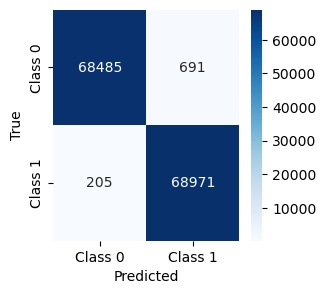

In [139]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_resampled, y_train_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [140]:
y_test_pred = navie_byes.predict(X_test)

In [141]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
29253,0,0
82732,0,0
14796,0,0
103448,1,1
99191,0,0


In [142]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.9906090925048271
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     29698
           1       0.94      0.99      0.97      4484

    accuracy                           0.99     34182
   macro avg       0.97      0.99      0.98     34182
weighted avg       0.99      0.99      0.99     34182



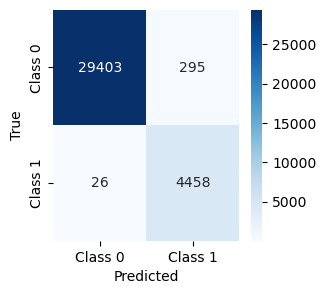

In [143]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Logistic Regression

In [144]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_resampled,y_resampled)

LogisticRegression()

In [145]:
y_train_pred = regressor.predict(X_resampled)

In [146]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_resampled, y_train_pred))
print(metrics.classification_report(y_resampled, y_train_pred))

0.9978171620215104
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     69176
           1       1.00      1.00      1.00     69176

    accuracy                           1.00    138352
   macro avg       1.00      1.00      1.00    138352
weighted avg       1.00      1.00      1.00    138352



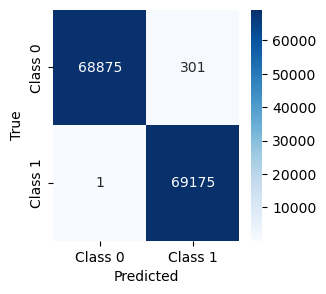

In [147]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_resampled, y_train_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [148]:
y_test_pred = regressor.predict(X_test)

In [149]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.9964601252120999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29698
           1       0.97      1.00      0.99      4484

    accuracy                           1.00     34182
   macro avg       0.99      1.00      0.99     34182
weighted avg       1.00      1.00      1.00     34182



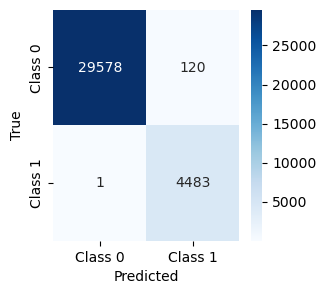

In [150]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Regualarization on Logistic Regression(mutual information)

In [151]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_resampled,y_resampled)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000, 'penalty': 'l2'}
accuracy : 0.9996819725585324


In [152]:
from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression(C=1000,penalty='l2')
log_regressor.fit(X_resampled,y_resampled)

LogisticRegression(C=1000)

In [153]:
y_train_pred = log_regressor.predict(X_resampled)

In [154]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_resampled, y_train_pred))
print(metrics.classification_report(y_resampled, y_train_pred))

0.9998698970741298
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     69176
           1       1.00      1.00      1.00     69176

    accuracy                           1.00    138352
   macro avg       1.00      1.00      1.00    138352
weighted avg       1.00      1.00      1.00    138352



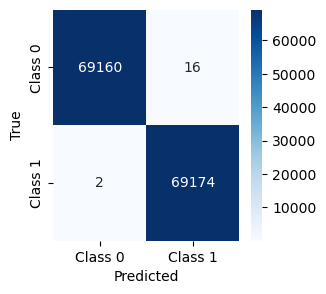

In [155]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_resampled, y_train_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [156]:
y_test_pred = log_regressor.predict(X_test)

In [157]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

0.999765958691709
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29698
           1       1.00      1.00      1.00      4484

    accuracy                           1.00     34182
   macro avg       1.00      1.00      1.00     34182
weighted avg       1.00      1.00      1.00     34182



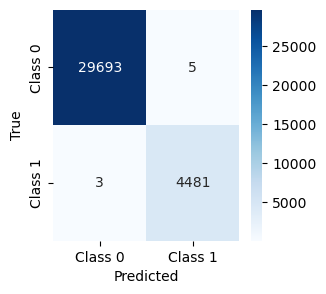

In [158]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(3,3))
labels = ['Class 0', 'Class 1']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()